### Packages

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

%matplotlib inline

### Load data and split into train/test sets

In [2]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [4]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

X_train = X_train_orig/255.
X_test = X_test_orig/255.

Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


y = 5


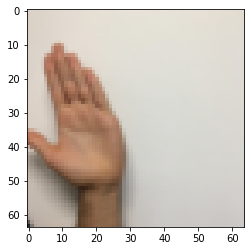

In [6]:
# Example of an image from the dataset
index = 300
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### TF Keras Functional API

In [14]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    We'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    ## RELU
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    ## RELU
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    ## FLATTEN
    ## Dense layer
    ## 6 neurons in output layer 
    # outputs

    Z1 = tfl.Conv2D(filters = 8,kernel_size = 4,strides=(1,1),padding='same')(input_img)
    A1 = tfl.ReLU()(Z1)
    P1 = tfl.MaxPool2D(pool_size=(8, 8), strides=(8, 8), padding='same')(A1)
    Z2 = tfl.Conv2D(filters = 16,kernel_size = 2,strides=(1,1),padding='same')(P1)
    A2 = tfl.ReLU()(Z2)
    P2 = tfl.MaxPool2D(pool_size=(4, 4), strides=(4, 4), padding='same')(A2)
    F = tfl.Flatten()(P2)
    outputs = tfl.Dense(units=6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [15]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
conv_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_6 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_7 (ReLU)              (None, 8, 8, 16)          0         
                                                           

### Train the Model

In [19]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 0s 26ms/step - loss: 0.4257 - accuracy: 0.8657 - val_loss: 0.4843 - val_accuracy: 0.8500
Epoch 2/100
17/17 [==============================] - 0s 28ms/step - loss: 0.4223 - accuracy: 0.8648 - val_loss: 0.4810 - val_accuracy: 0.8583
Epoch 3/100
17/17 [==============================] - 0s 28ms/step - loss: 0.4191 - accuracy: 0.8657 - val_loss: 0.4778 - val_accuracy: 0.8583
Epoch 4/100
17/17 [==============================] - 0s 28ms/step - loss: 0.4159 - accuracy: 0.8685 - val_loss: 0.4748 - val_accuracy: 0.8500
Epoch 5/100
17/17 [==============================] - 0s 26ms/step - loss: 0.4128 - accuracy: 0.8685 - val_loss: 0.4718 - val_accuracy: 0.8500
Epoch 6/100
17/17 [==============================] - 0s 27ms/step - loss: 0.4097 - accuracy: 0.8704 - val_loss: 0.4689 - val_accuracy: 0.8500
Epoch 7/100
17/17 [==============================] - 0s 26ms/step - loss: 0.4066 - accuracy: 0.8731 - val_loss: 0.4663 - val_accuracy: 0.8500
Epoch 

17/17 [==============================] - 0s 30ms/step - loss: 0.2890 - accuracy: 0.9185 - val_loss: 0.3683 - val_accuracy: 0.8667
Epoch 59/100
17/17 [==============================] - 0s 29ms/step - loss: 0.2873 - accuracy: 0.9185 - val_loss: 0.3665 - val_accuracy: 0.8667
Epoch 60/100
17/17 [==============================] - 0s 29ms/step - loss: 0.2854 - accuracy: 0.9194 - val_loss: 0.3654 - val_accuracy: 0.8667
Epoch 61/100
17/17 [==============================] - 0s 29ms/step - loss: 0.2835 - accuracy: 0.9204 - val_loss: 0.3639 - val_accuracy: 0.8667
Epoch 62/100
17/17 [==============================] - 1s 32ms/step - loss: 0.2819 - accuracy: 0.9222 - val_loss: 0.3636 - val_accuracy: 0.8667
Epoch 63/100
17/17 [==============================] - 1s 29ms/step - loss: 0.2800 - accuracy: 0.9204 - val_loss: 0.3617 - val_accuracy: 0.8667
Epoch 64/100
17/17 [==============================] - 1s 30ms/step - loss: 0.2783 - accuracy: 0.9213 - val_loss: 0.3609 - val_accuracy: 0.8667
Epoch 65/100

<a name='5'></a>
###  History Object 

The history object is an output of the `.fit()` operation, and provides a record of all the loss and metric values in memory. It's stored as a dictionary that we can retrieve at `history.history`: 

In [20]:
history.history

{'loss': [0.4257359802722931,
  0.42225632071495056,
  0.41914764046669006,
  0.4159003794193268,
  0.4127584397792816,
  0.4096514880657196,
  0.40655818581581116,
  0.4035669267177582,
  0.4007101356983185,
  0.39757320284843445,
  0.39450138807296753,
  0.3916662633419037,
  0.38898909091949463,
  0.38632622361183167,
  0.38355782628059387,
  0.3810115456581116,
  0.3783228397369385,
  0.37593764066696167,
  0.3730720281600952,
  0.37078937888145447,
  0.36818593740463257,
  0.365458607673645,
  0.36293187737464905,
  0.3605636656284332,
  0.3581647276878357,
  0.35592567920684814,
  0.3535435199737549,
  0.3513248562812805,
  0.34882816672325134,
  0.34649473428726196,
  0.34440842270851135,
  0.3421977758407593,
  0.33969736099243164,
  0.33757928013801575,
  0.3351455628871918,
  0.33310267329216003,
  0.33094140887260437,
  0.32874709367752075,
  0.3266482949256897,
  0.3243849277496338,
  0.32233837246894836,
  0.3203354775905609,
  0.3182847797870636,
  0.3161991238594055,
  0